In [84]:
import numpy as np
import matplotlib.pyplot as plt
import os, json
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [85]:
path_to_json = 'results/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

['transformer-adam-dropout_False-strategy_greedy.json', 'transformer-sgd-dropout_True-strategy_greedy.json', 'transformer-adam-dropout_True-strategy_random.json', 'transformer-adam-dropout_True-strategy_greedy.json', 'seq2seq-sgd-dropout_True-strategy_greedy.json', 'seq2seq-adam-dropout_False-strategy_greedy.json', 'seq2seq-adam-dropout_True-strategy_random.json', 'seq2seq-adam-dropout_True-strategy_greedy.json']


transformer-adam-dropout_False-strategy_greedy.json
test_loss:  2.6931188702583313
test_ppl:  14.777693830969767
test_bleu1:  45.301395654678345
test_bleu2:  59.45674180984497
test_time:  1.863915205001831
info_total:  [15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216]
info_used:  [3558866944, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464]
info_free:  [12284854272, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752]
transformer-sgd-dropout_True-strategy_greedy.json
test_loss:  9.366960167884827
test_ppl:  11695.508613353699
test_bleu1:  0.0
test_bleu2:  0.02604167675599456
test_time:  1.8732097148895264
info_total:  [15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216]
info_used:  [7329546240, 7677673472, 7677673472,

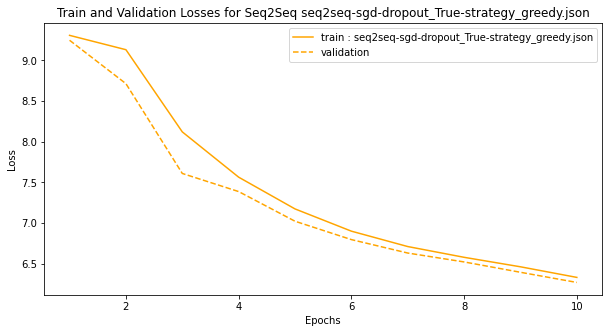

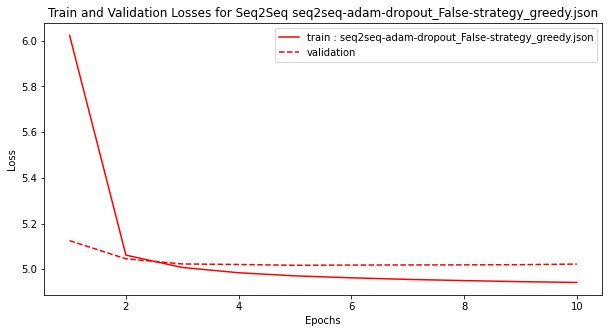

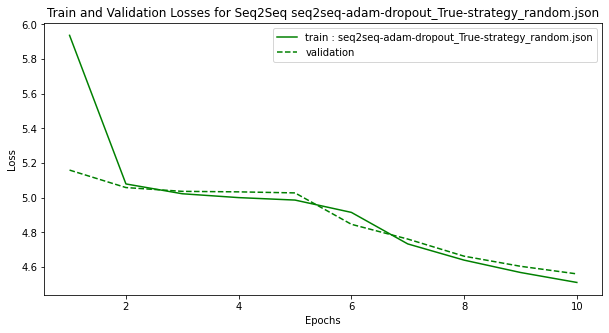

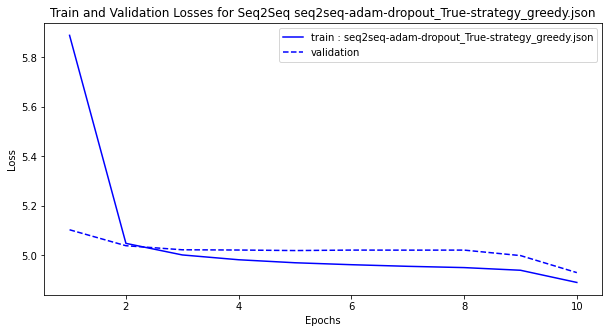

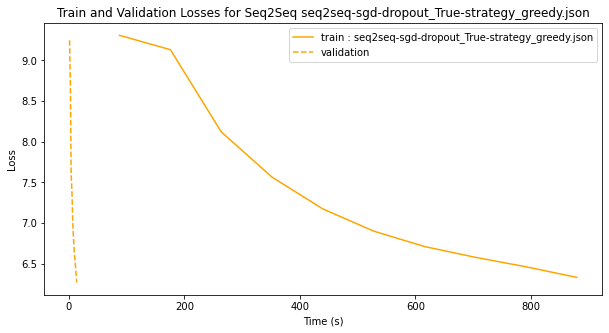

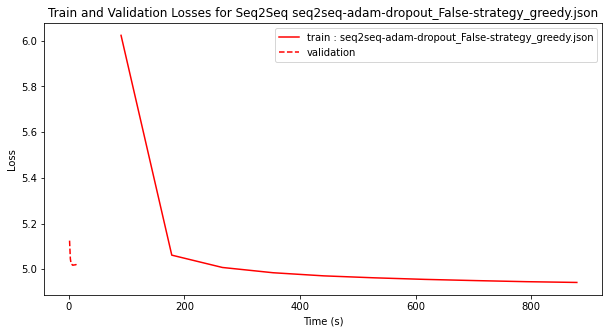

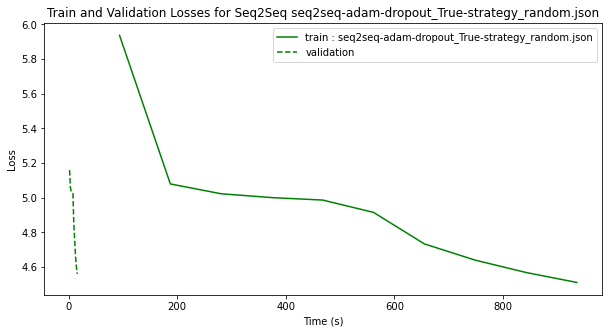

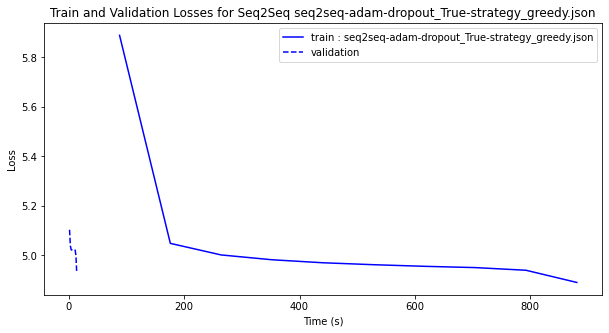

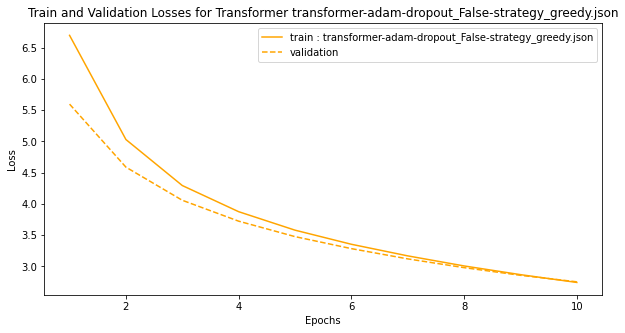

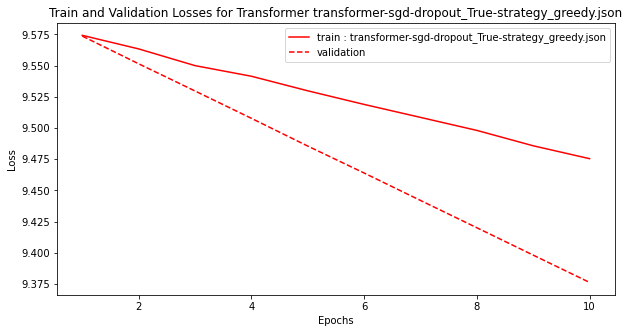

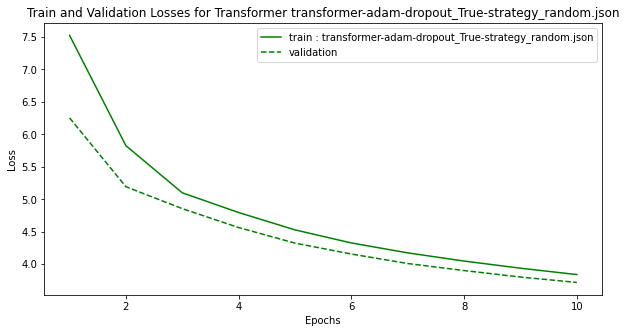

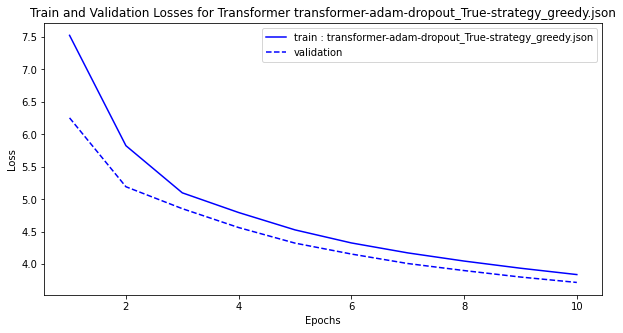

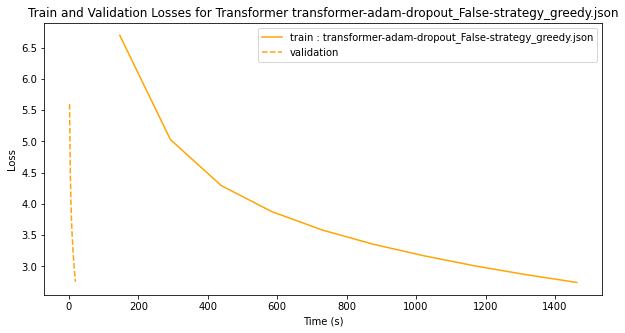

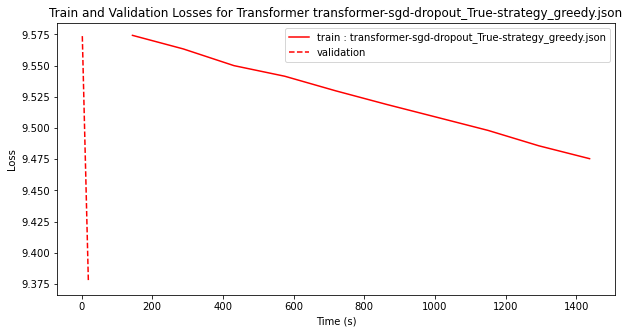

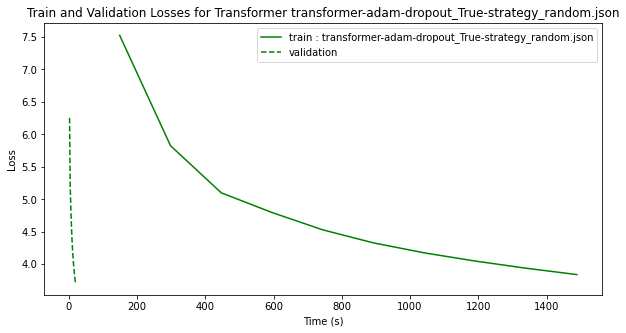

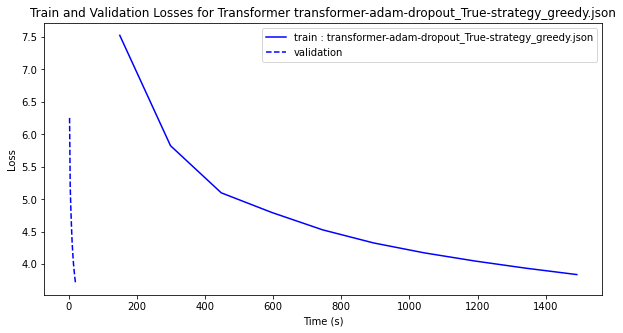

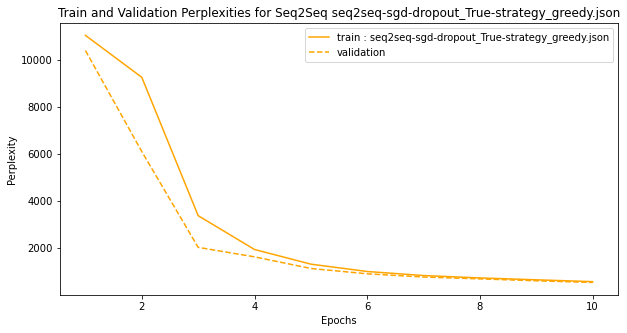

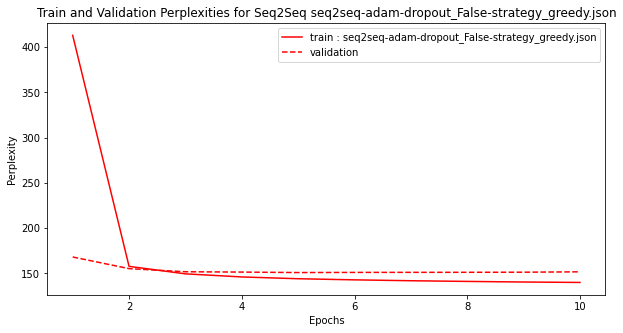

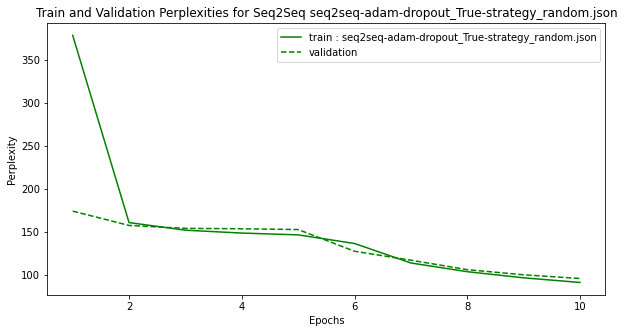

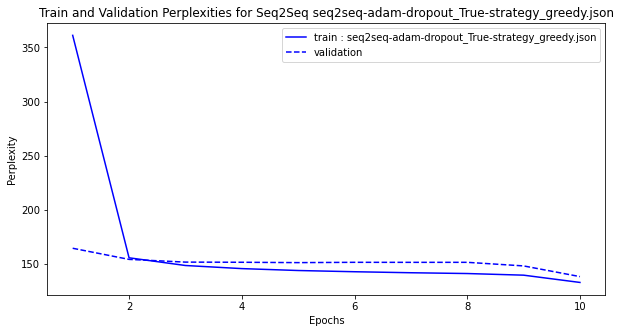

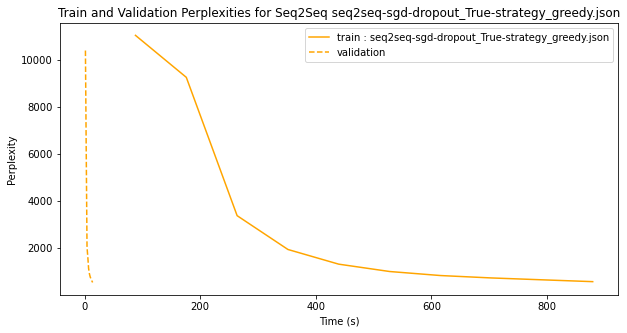

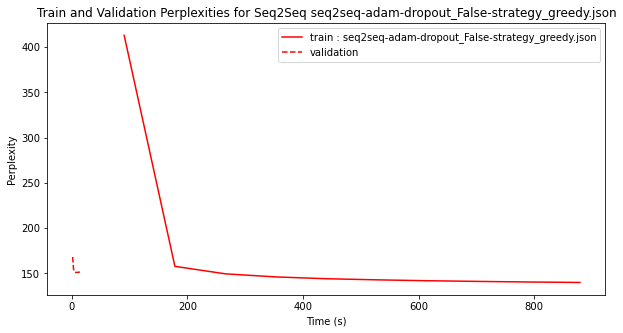

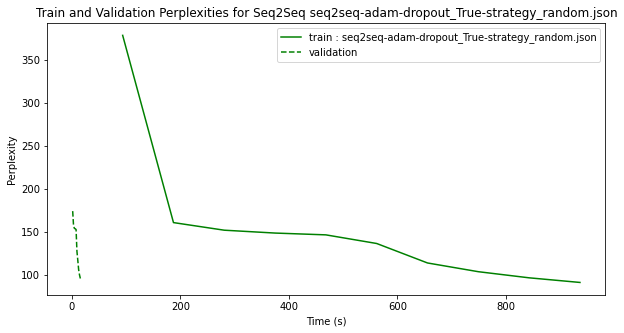

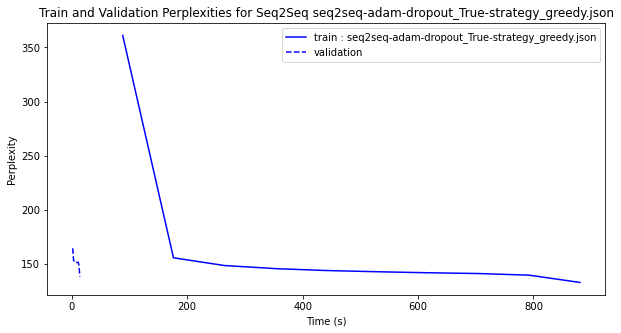

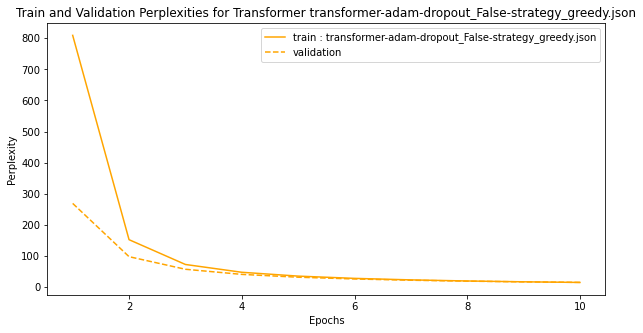

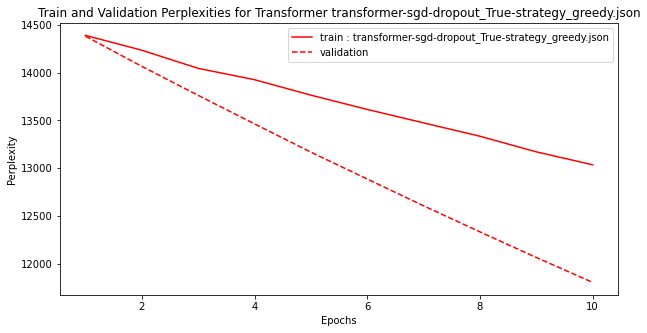

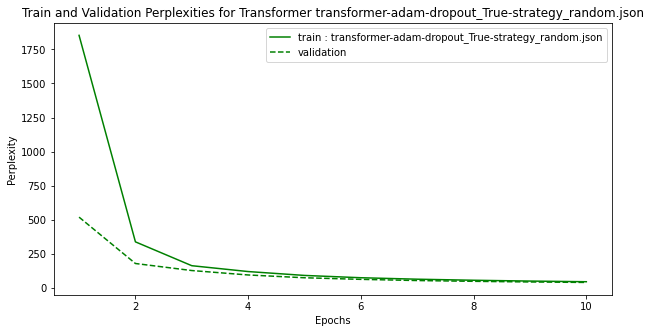

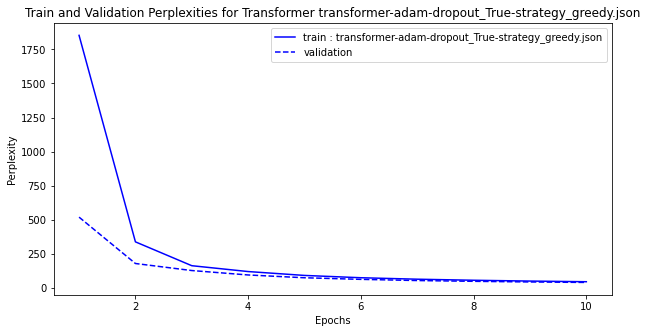

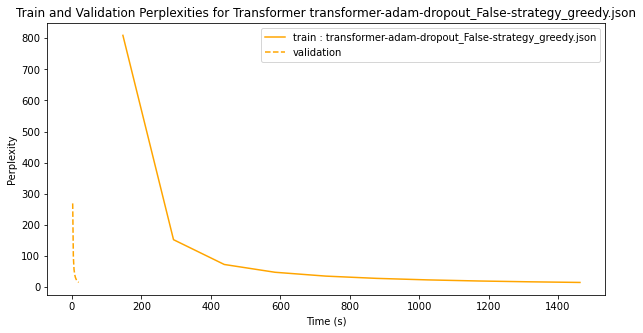

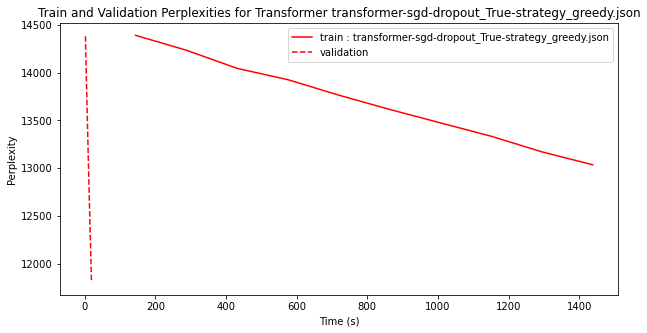

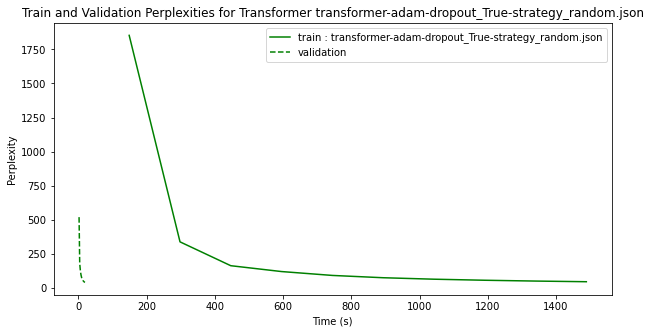

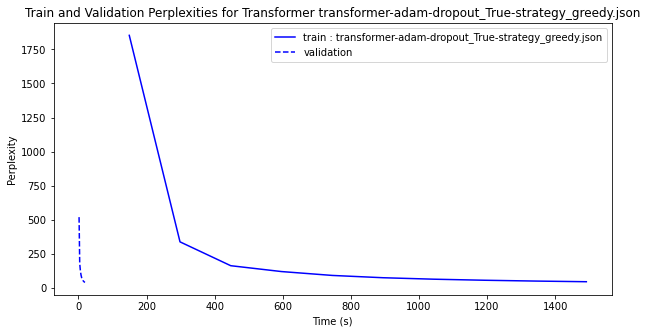

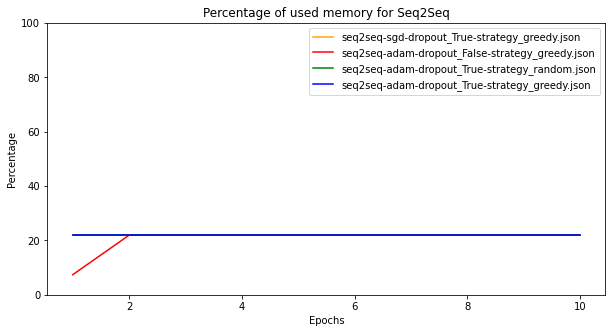

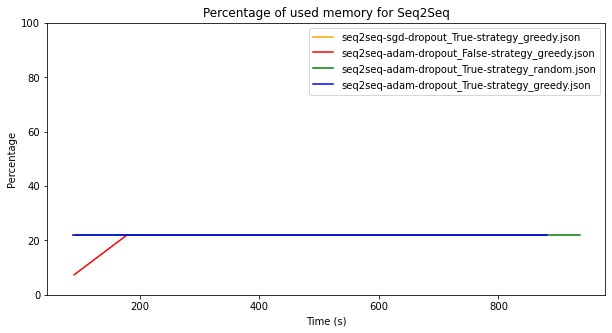

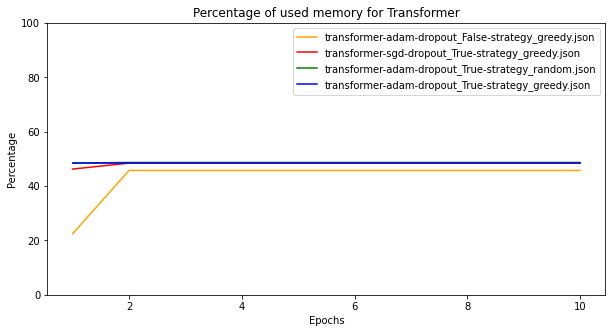

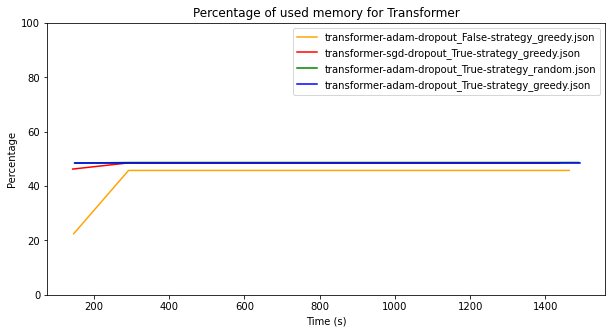

In [88]:
train_losses_transformer = {}
train_ppls_transformer = {}
train_times_transformer = {}
valid_losses_transformer = {}
valid_ppls_transformer = {}
valid_times_transformer = {}
test_loss_transformer = {}
test_ppl_transformer = {}
test_bleu1_transformer = {}
test_bleu2_transformer = {}
test_time_transformer = {}
info_total_transformer = {}
info_used_transformer = {}
info_free_transformer = {}

train_losses_seq2seq = {}
train_ppls_seq2seq = {}
train_times_seq2seq = {}
valid_losses_seq2seq = {}
valid_ppls_seq2seq = {}
valid_times_seq2seq = {}
test_loss_seq2seq = {}
test_ppl_seq2seq = {}
test_bleu1_seq2seq = {}
test_bleu2_seq2seq = {}
test_time_seq2seq = {}
info_total_seq2seq = {}
info_used_seq2seq = {}
info_free_seq2seq = {}

for index, js in enumerate(json_files):
    print(js)
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        if 'transformer' in js:
            train_losses_transformer[js] = json_text['train_losses']
            train_ppls_transformer[js] = json_text['train_ppls']
            train_times_transformer[js] = json_text['train_times']
            valid_losses_transformer[js] = json_text['valid_losses']
            valid_ppls_transformer[js] = json_text['valid_ppls']
            valid_times_transformer[js] = json_text['valid_times']
            test_loss_transformer[js] = json_text['test_loss']
            test_ppl_transformer[js] = json_text['test_ppl']
            test_bleu1_transformer[js] = json_text['test_bleu1']
            test_bleu2_transformer[js] = json_text['test_bleu2']
            test_time_transformer[js] = json_text['test_time']
            info_total_transformer[js] = json_text['info_total']
            info_used_transformer[js] = json_text['info_used']
            info_free_transformer[js] = json_text['info_free']
        else:
            train_losses_seq2seq[js] = json_text['train_losses']
            train_ppls_seq2seq[js] = json_text['train_ppls']
            train_times_seq2seq[js] = json_text['train_times']
            valid_losses_seq2seq[js] = json_text['valid_losses']
            valid_ppls_seq2seq[js] = json_text['valid_ppls']
            valid_times_seq2seq[js] = json_text['valid_times']
            test_loss_seq2seq[js] = json_text['test_loss']
            test_ppl_seq2seq[js] = json_text['test_ppl']
            test_bleu1_seq2seq[js] = json_text['test_bleu1']
            test_bleu2_seq2seq[js] = json_text['test_bleu2']
            test_time_seq2seq[js] = json_text['test_time']
            info_total_seq2seq[js] = json_text['info_total']
            info_used_seq2seq[js] = json_text['info_used']
            info_free_seq2seq[js] = json_text['info_free']
        #print test results
        print('test_loss: ', json_text['test_loss'])
        print('test_ppl: ', json_text['test_ppl'])
        print('test_bleu1: ', json_text['test_bleu1'])
        print('test_bleu2: ', json_text['test_bleu2'])
        print('test_time: ', json_text['test_time'])
        print('info_total: ', json_text['info_total'])
        print('info_used: ', json_text['info_used'])
        print('info_free: ', json_text['info_free'])

#cumsum train_times
for key in train_times_seq2seq:
    train_times_seq2seq[key] = np.cumsum(train_times_seq2seq[key])
    valid_times_seq2seq[key] = np.cumsum(valid_times_seq2seq[key])

for key in train_times_transformer:
    train_times_transformer[key] = np.cumsum(train_times_transformer[key])
    valid_times_transformer[key] = np.cumsum(valid_times_transformer[key])

n_epochs = 10

#plot train, val loss for seq2seq with different architectures (epochs)
colors = ['b', 'g', 'r', 'orange']
for key in train_losses_seq2seq:
    plt.figure(figsize=(10, 5))
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), train_losses_seq2seq[key], label='train : '+key, color=color)
    plt.plot(np.arange(1, n_epochs+1), valid_losses_seq2seq[key], linestyle='dashed', color=color)
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], color=color, label='validation', linestyle='dashed')
    handles.extend([line])
    plt.title('Train and Validation Losses for Seq2Seq ' + key)
    plt.legend(handles = handles)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    #save plot
    plt.savefig('./plot/train_val_loss_seq2seq_'+ key + '.png')
    plt.show()

#plot train, val loss  for seq2seq with different architectures (times)
colors = ['b', 'g', 'r', 'orange']
for key in train_losses_seq2seq:
    plt.figure(figsize=(10, 5))
    color = colors.pop()
    plt.plot(train_times_seq2seq[key], train_losses_seq2seq[key], label='train : '+key, color=color)
    plt.plot(valid_times_seq2seq[key], valid_losses_seq2seq[key], linestyle='dashed', color=color)
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], color=color, label='validation', linestyle='dashed')
    handles.extend([line])
    plt.title('Train and Validation Losses for Seq2Seq ' + key)
    plt.legend(handles = handles)
    plt.xlabel('Time (s)')
    plt.ylabel('Loss')
    #save plot
    plt.savefig('./plot/train_val_loss_seq2seq_time_'+ key + '.png')
    plt.show()

#plot train, val loss for transformer with different architectures (epochs)
colors = ['b', 'g', 'r', 'orange']
for key in train_losses_transformer:
    plt.figure(figsize=(10, 5))
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), train_losses_transformer[key], label='train : '+key, color=color)
    plt.plot(np.arange(1, n_epochs+1), valid_losses_transformer[key], linestyle='dashed', color=color)
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], color=color, label='validation', linestyle='dashed')
    handles.extend([line])
    plt.title('Train and Validation Losses for Transformer ' + key)
    plt.legend(handles = handles)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    #save plot
    plt.savefig('./plot/train_val_loss_transformer_'+ key + '.png')
    plt.show()

#plot train, val loss for transformer with different architectures (times)
colors = ['b', 'g', 'r', 'orange']
for key in train_losses_transformer:
    plt.figure(figsize=(10, 5))
    color = colors.pop()
    plt.plot(train_times_transformer[key], train_losses_transformer[key], label='train : '+key, color=color)
    plt.plot(valid_times_transformer[key], valid_losses_transformer[key], linestyle='dashed', color=color)
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], color=color, label='validation', linestyle='dashed')
    handles.extend([line])
    plt.title('Train and Validation Losses for Transformer ' + key)
    plt.legend(handles = handles)
    plt.xlabel('Time (s)')
    plt.ylabel('Loss')
    #save plot
    plt.savefig('./plot/train_val_loss_transformer_time_'+ key + '.png')
    plt.show()

#plot train, val ppl for seq2seq with different architectures (epochs)
colors = ['b', 'g', 'r', 'orange']
for key in train_ppls_seq2seq:
    plt.figure(figsize=(10, 5))
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), train_ppls_seq2seq[key], label='train : '+key, color=color)
    plt.plot(np.arange(1, n_epochs+1), valid_ppls_seq2seq[key], linestyle='dashed', color=color)
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], color=color, label='validation', linestyle='dashed')
    handles.extend([line])
    plt.title('Train and Validation Perplexities for Seq2Seq ' + key)
    plt.legend(handles = handles)
    plt.xlabel('Epochs')
    plt.ylabel('Perplexity')
    #save plot
    plt.savefig('./plot/train_val_ppl_seq2seq_'+ key + '.png')
    plt.show()

#plot train, val ppl for seq2seq with different architectures (times)
colors = ['b', 'g', 'r', 'orange']
for key in train_ppls_seq2seq:
    plt.figure(figsize=(10, 5))
    color = colors.pop()
    plt.plot(train_times_seq2seq[key], train_ppls_seq2seq[key], label='train : '+key, color=color)
    plt.plot(valid_times_seq2seq[key], valid_ppls_seq2seq[key], linestyle='dashed', color=color)
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], color=color, label='validation', linestyle='dashed')
    handles.extend([line])
    plt.title('Train and Validation Perplexities for Seq2Seq ' + key)
    plt.legend(handles = handles)
    plt.xlabel('Time (s)')
    plt.ylabel('Perplexity')
    #save plot
    plt.savefig('./plot/train_val_ppl_seq2seq_time_'+ key + '.png')
    plt.show()

#plot train, val ppl for transformer with different architectures (epochs)
colors = ['b', 'g', 'r', 'orange']
for key in train_ppls_transformer:
    plt.figure(figsize=(10, 5))
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), train_ppls_transformer[key], label='train : '+key, color=color)
    plt.plot(np.arange(1, n_epochs+1), valid_ppls_transformer[key], linestyle='dashed', color=color)
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], color=color, label='validation', linestyle='dashed')
    handles.extend([line])
    plt.title('Train and Validation Perplexities for Transformer ' + key)
    plt.legend(handles=handles)
    plt.xlabel('Epochs')
    plt.ylabel('Perplexity')
    #save plot
    plt.savefig('./plot/train_val_ppl_transformer_'+ key + '.png')
    plt.show()

#plot train, val ppl for transformer with different architectures (times)
colors = ['b', 'g', 'r', 'orange']
for key in train_ppls_transformer:
    plt.figure(figsize=(10, 5))
    color = colors.pop()
    plt.plot(train_times_transformer[key], train_ppls_transformer[key], label='train : '+key, color=color)
    plt.plot(valid_times_transformer[key], valid_ppls_transformer[key], linestyle='dashed', color=color)
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], color=color, label='validation', linestyle='dashed')
    handles.extend([line])
    plt.title('Train and Validation Perplexities for Transformer ' + key)
    plt.legend(handles = handles)
    plt.xlabel('Time (s)')
    plt.ylabel('Perplexity')
    #save plot
    plt.savefig('./plot/train_val_ppl_transformer_time_'+ key + '.png')
    plt.show()

#plot memory usage for seq2seq with different architectures (epochs)
percentage_used_memory = {}
for i in info_used_seq2seq:
    percentage_used_memory[i] = [100 * x/y for x, y in zip(info_used_seq2seq[i], info_total_seq2seq[i])]

plt.figure(figsize=(10, 5))
colors = ['b', 'g', 'r', 'orange']
for key in percentage_used_memory:
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), percentage_used_memory[key], label=key, color=color)
plt.title('Percentage of used memory for Seq2Seq')
plt.ylim(0, 100)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Percentage')
#save plot
plt.savefig('./plot/percentage_used_memory_seq2seq.png')
plt.show()

#plot memory usage for seq2seq with different architectures (times)
plt.figure(figsize=(10, 5))
colors = ['b', 'g', 'r', 'orange']
for key in percentage_used_memory:
    color = colors.pop()
    plt.plot(train_times_seq2seq[key], percentage_used_memory[key], label=key, color=color)
plt.title('Percentage of used memory for Seq2Seq')
plt.ylim(0, 100)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Percentage')
#save plot
plt.savefig('./plot/percentage_used_memory_seq2seq_time.png')
plt.show()

#plot memory usage for transformer with different architectures (epochs)
percentage_used_memory = {}
for i in info_used_transformer:
    percentage_used_memory[i] = [100 * x/y for x, y in zip(info_used_transformer[i], info_total_transformer[i])]
plt.figure(figsize=(10, 5))
colors = ['b', 'g', 'r', 'orange']
for key in percentage_used_memory:
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), percentage_used_memory[key], label=key, color=color)
plt.title('Percentage of used memory for Transformer')
plt.ylim(0, 100)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Percentage')
#save plot
plt.savefig('./plot/percentage_used_memory_transformer.png')
plt.show()

#plot memory usage for transformer with different architectures (times)
plt.figure(figsize=(10, 5))
epochs = np.arange(1, n_epochs+1)
colors = ['b', 'g', 'r', 'orange']
for key in percentage_used_memory:
    color = colors.pop()
    plt.plot(train_times_transformer[key], percentage_used_memory[key], label=key, color=color)
plt.title('Percentage of used memory for Transformer')
plt.legend()
plt.ylim(0, 100)
plt.xlabel('Time (s)')
plt.ylabel('Percentage')
#save plot
plt.savefig('./plot/percentage_used_memory_transformer_time.png')
plt.show()

transformer-adam-dropout_False-strategy_greedy.json
test_loss:  2.6931188702583313
test_ppl:  14.777693830969767
test_bleu1:  45.301395654678345
test_bleu2:  59.45674180984497
test_time:  1.863915205001831
info_total:  [15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216]
info_used:  [3558866944, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464]
info_free:  [12284854272, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752]
transformer-sgd-dropout_True-strategy_greedy.json
test_loss:  9.366960167884827
test_ppl:  11695.508613353699
test_bleu1:  0.0
test_bleu2:  0.02604167675599456
test_time:  1.8732097148895264
info_total:  [15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216]
info_used:  [7329546240, 7677673472, 7677673472,

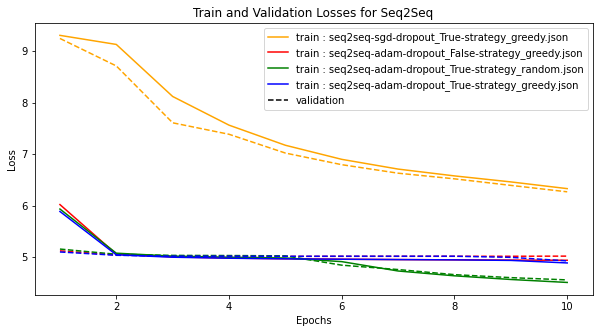

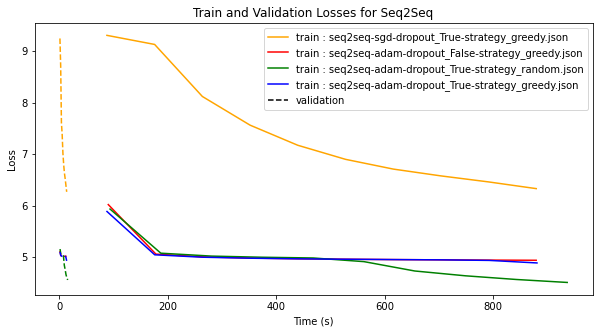

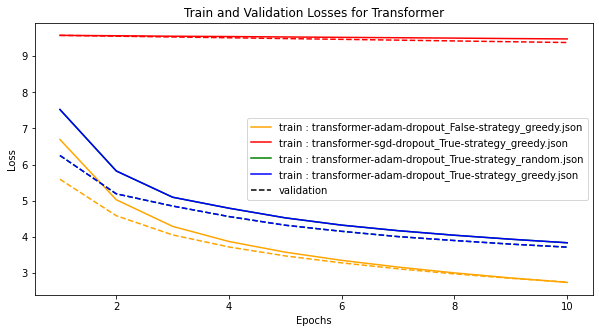

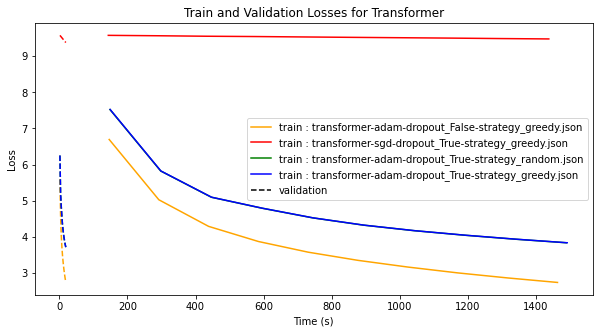

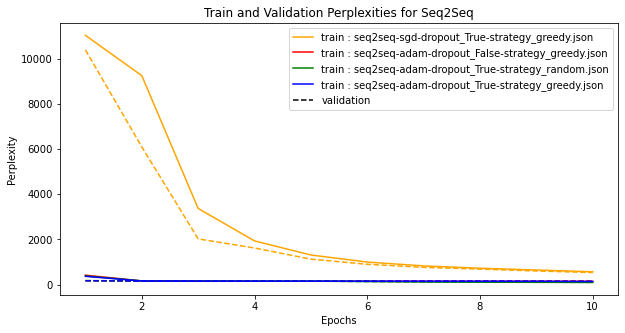

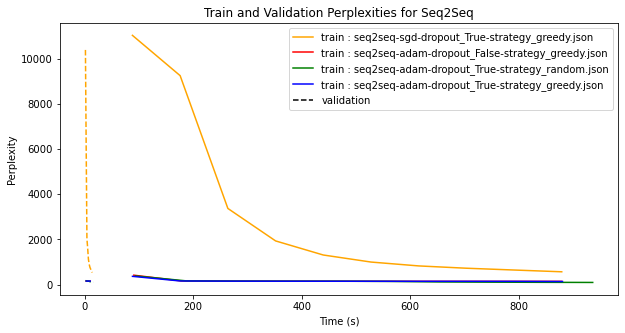

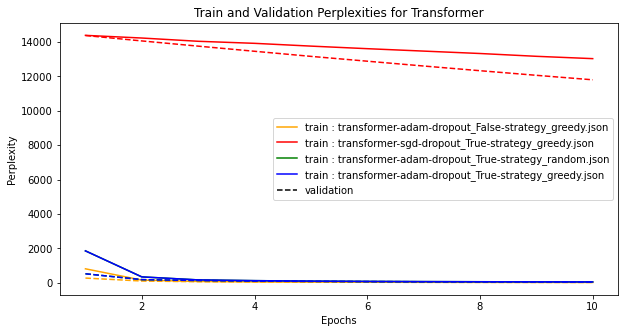

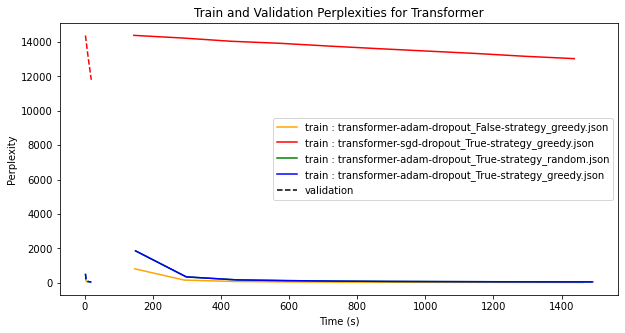

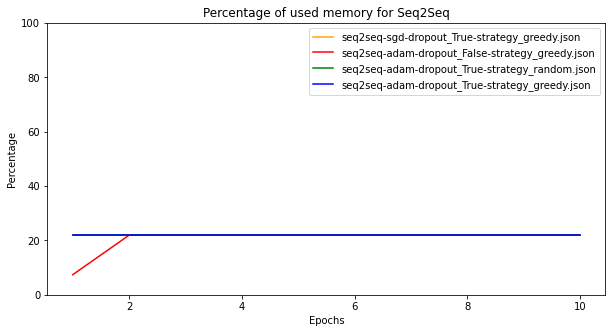

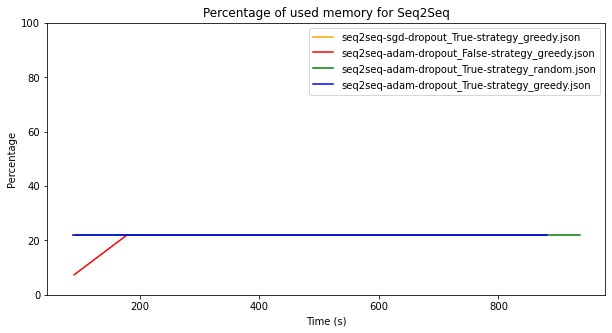

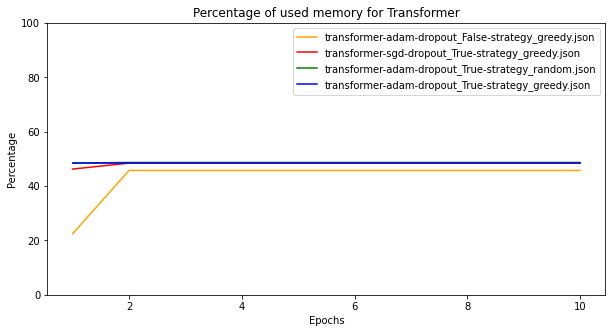

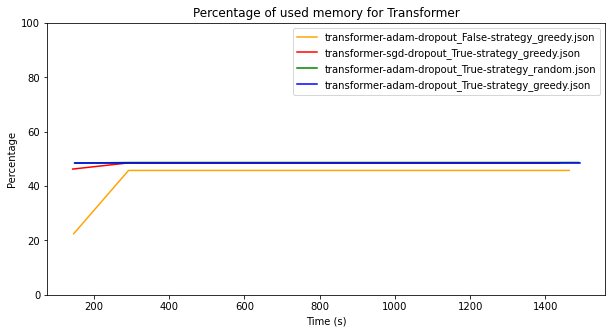

In [87]:
train_losses_transformer = {}
train_ppls_transformer = {}
train_times_transformer = {}
valid_losses_transformer = {}
valid_ppls_transformer = {}
valid_times_transformer = {}
test_loss_transformer = {}
test_ppl_transformer = {}
test_bleu1_transformer = {}
test_bleu2_transformer = {}
test_time_transformer = {}
info_total_transformer = {}
info_used_transformer = {}
info_free_transformer = {}

train_losses_seq2seq = {}
train_ppls_seq2seq = {}
train_times_seq2seq = {}
valid_losses_seq2seq = {}
valid_ppls_seq2seq = {}
valid_times_seq2seq = {}
test_loss_seq2seq = {}
test_ppl_seq2seq = {}
test_bleu1_seq2seq = {}
test_bleu2_seq2seq = {}
test_time_seq2seq = {}
info_total_seq2seq = {}
info_used_seq2seq = {}
info_free_seq2seq = {}

for index, js in enumerate(json_files):
    print(js)
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        if 'transformer' in js:
            train_losses_transformer[js] = json_text['train_losses']
            train_ppls_transformer[js] = json_text['train_ppls']
            train_times_transformer[js] = json_text['train_times']
            valid_losses_transformer[js] = json_text['valid_losses']
            valid_ppls_transformer[js] = json_text['valid_ppls']
            valid_times_transformer[js] = json_text['valid_times']
            test_loss_transformer[js] = json_text['test_loss']
            test_ppl_transformer[js] = json_text['test_ppl']
            test_bleu1_transformer[js] = json_text['test_bleu1']
            test_bleu2_transformer[js] = json_text['test_bleu2']
            test_time_transformer[js] = json_text['test_time']
            info_total_transformer[js] = json_text['info_total']
            info_used_transformer[js] = json_text['info_used']
            info_free_transformer[js] = json_text['info_free']
        else:
            train_losses_seq2seq[js] = json_text['train_losses']
            train_ppls_seq2seq[js] = json_text['train_ppls']
            train_times_seq2seq[js] = json_text['train_times']
            valid_losses_seq2seq[js] = json_text['valid_losses']
            valid_ppls_seq2seq[js] = json_text['valid_ppls']
            valid_times_seq2seq[js] = json_text['valid_times']
            test_loss_seq2seq[js] = json_text['test_loss']
            test_ppl_seq2seq[js] = json_text['test_ppl']
            test_bleu1_seq2seq[js] = json_text['test_bleu1']
            test_bleu2_seq2seq[js] = json_text['test_bleu2']
            test_time_seq2seq[js] = json_text['test_time']
            info_total_seq2seq[js] = json_text['info_total']
            info_used_seq2seq[js] = json_text['info_used']
            info_free_seq2seq[js] = json_text['info_free']
        #print test results
        print('test_loss: ', json_text['test_loss'])
        print('test_ppl: ', json_text['test_ppl'])
        print('test_bleu1: ', json_text['test_bleu1'])
        print('test_bleu2: ', json_text['test_bleu2'])
        print('test_time: ', json_text['test_time'])
        print('info_total: ', json_text['info_total'])
        print('info_used: ', json_text['info_used'])
        print('info_free: ', json_text['info_free'])

#cumsum train_times
for key in train_times_seq2seq:
    train_times_seq2seq[key] = np.cumsum(train_times_seq2seq[key])
    valid_times_seq2seq[key] = np.cumsum(valid_times_seq2seq[key])

for key in train_times_transformer:
    train_times_transformer[key] = np.cumsum(train_times_transformer[key])
    valid_times_transformer[key] = np.cumsum(valid_times_transformer[key])

n_epochs = 10

#plot train, val loss for seq2seq with different architectures (epochs)
colors = ['b', 'g', 'r', 'orange']
plt.figure(figsize=(10, 5))
for key in train_losses_seq2seq:
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), train_losses_seq2seq[key], label='train : '+key, color=color)
    plt.plot(np.arange(1, n_epochs+1), valid_losses_seq2seq[key], linestyle='dashed', color=color)
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], color='k', label='validation', linestyle='dashed')
handles.extend([line])
plt.title('Train and Validation Losses for Seq2Seq')
plt.legend(handles = handles)
plt.xlabel('Epochs')
plt.ylabel('Loss')
#save plot
plt.savefig('./plot_concate/train_val_loss_seq2seq.png')
plt.show()

#plot train, val loss  for seq2seq with different architectures (times)
colors = ['b', 'g', 'r', 'orange']
plt.figure(figsize=(10, 5))
for key in train_losses_seq2seq:
    color = colors.pop()
    plt.plot(train_times_seq2seq[key], train_losses_seq2seq[key], label='train : '+key, color=color)
    plt.plot(valid_times_seq2seq[key], valid_losses_seq2seq[key], linestyle='dashed', color=color)
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], color='k', label='validation', linestyle='dashed')
handles.extend([line])
plt.title('Train and Validation Losses for Seq2Seq')
plt.legend(handles = handles)
plt.xlabel('Time (s)')
plt.ylabel('Loss')
#save plot
plt.savefig('./plot_concate/train_val_loss_seq2seq_time.png')
plt.show()

#plot train, val loss for transformer with different architectures (epochs)
colors = ['b', 'g', 'r', 'orange']
plt.figure(figsize=(10, 5))
for key in train_losses_transformer:
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), train_losses_transformer[key], label='train : '+key, color=color)
    plt.plot(np.arange(1, n_epochs+1), valid_losses_transformer[key], linestyle='dashed', color=color)
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], color='k', label='validation', linestyle='dashed')
handles.extend([line])
plt.title('Train and Validation Losses for Transformer')
plt.legend(handles = handles)
plt.xlabel('Epochs')
plt.ylabel('Loss')
#save plot
plt.savefig('./plot_concate/train_val_loss_transformer.png')
plt.show()

#plot train, val loss for transformer with different architectures (times)
colors = ['b', 'g', 'r', 'orange']
plt.figure(figsize=(10, 5))
for key in train_losses_transformer:
    color = colors.pop()
    plt.plot(train_times_transformer[key], train_losses_transformer[key], label='train : '+key, color=color)
    plt.plot(valid_times_transformer[key], valid_losses_transformer[key], linestyle='dashed', color=color)
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], color='k', label='validation', linestyle='dashed')
handles.extend([line])
plt.title('Train and Validation Losses for Transformer')
plt.legend(handles = handles)
plt.xlabel('Time (s)')
plt.ylabel('Loss')
#save plot
plt.savefig('./plot_concate/train_val_loss_transformer_time.png')
plt.show()

#plot train, val ppl for seq2seq with different architectures (epochs)
colors = ['b', 'g', 'r', 'orange']
plt.figure(figsize=(10, 5))
for key in train_ppls_seq2seq:
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), train_ppls_seq2seq[key], label='train : '+key, color=color)
    plt.plot(np.arange(1, n_epochs+1), valid_ppls_seq2seq[key], linestyle='dashed', color=color)
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], color='k', label='validation', linestyle='dashed')
handles.extend([line])
plt.title('Train and Validation Perplexities for Seq2Seq')
plt.legend(handles = handles)
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
#save plot
plt.savefig('./plot_concate/train_val_ppl_seq2seq.png')
plt.show()

#plot train, val ppl for seq2seq with different architectures (times)
colors = ['b', 'g', 'r', 'orange']
plt.figure(figsize=(10, 5))
for key in train_ppls_seq2seq:
    color = colors.pop()
    plt.plot(train_times_seq2seq[key], train_ppls_seq2seq[key], label='train : '+key, color=color)
    plt.plot(valid_times_seq2seq[key], valid_ppls_seq2seq[key], linestyle='dashed', color=color)
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], color='k', label='validation', linestyle='dashed')
handles.extend([line])
plt.title('Train and Validation Perplexities for Seq2Seq')
plt.legend(handles = handles)
plt.xlabel('Time (s)')
plt.ylabel('Perplexity')
#save plot
plt.savefig('./plot_concate/train_val_ppl_seq2seq_time.png')
plt.show()

#plot train, val ppl for transformer with different architectures (epochs)
colors = ['b', 'g', 'r', 'orange']
plt.figure(figsize=(10, 5))
for key in train_ppls_transformer:
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), train_ppls_transformer[key], label='train : '+key, color=color)
    plt.plot(np.arange(1, n_epochs+1), valid_ppls_transformer[key], linestyle='dashed', color=color)
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], color='k', label='validation', linestyle='dashed')
handles.extend([line])
plt.title('Train and Validation Perplexities for Transformer')
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
#save plot
plt.savefig('./plot_concate/train_val_ppl_transformer.png')
plt.show()

#plot train, val ppl for transformer with different architectures (times)
colors = ['b', 'g', 'r', 'orange']
plt.figure(figsize=(10, 5))
for key in train_ppls_transformer:
    color = colors.pop()
    plt.plot(train_times_transformer[key], train_ppls_transformer[key], label='train : '+key, color=color)
    plt.plot(valid_times_transformer[key], valid_ppls_transformer[key], linestyle='dashed', color=color)
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], color='k', label='validation', linestyle='dashed')
handles.extend([line])
plt.title('Train and Validation Perplexities for Transformer')
plt.legend(handles = handles)
plt.xlabel('Time (s)')
plt.ylabel('Perplexity')
#save plot
plt.savefig('./plot_concate/train_val_ppl_transformer_time.png')
plt.show()

#plot memory usage for seq2seq with different architectures (epochs)
percentage_used_memory = {}
for i in info_used_seq2seq:
    percentage_used_memory[i] = [100 * x/y for x, y in zip(info_used_seq2seq[i], info_total_seq2seq[i])]

plt.figure(figsize=(10, 5))
colors = ['b', 'g', 'r', 'orange']
for key in percentage_used_memory:
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), percentage_used_memory[key], label=key, color=color)
plt.title('Percentage of used memory for Seq2Seq')
plt.ylim(0, 100)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Percentage')
#save plot
plt.savefig('./plot_concate/percentage_used_memory_seq2seq.png')
plt.show()

#plot memory usage for seq2seq with different architectures (times)
plt.figure(figsize=(10, 5))
colors = ['b', 'g', 'r', 'orange']
for key in percentage_used_memory:
    color = colors.pop()
    plt.plot(train_times_seq2seq[key], percentage_used_memory[key], label=key, color=color)
plt.title('Percentage of used memory for Seq2Seq')
plt.ylim(0, 100)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Percentage')
#save plot
plt.savefig('./plot_concate/percentage_used_memory_seq2seq_time.png')
plt.show()

#plot memory usage for transformer with different architectures (epochs)
percentage_used_memory = {}
for i in info_used_transformer:
    percentage_used_memory[i] = [100 * x/y for x, y in zip(info_used_transformer[i], info_total_transformer[i])]
plt.figure(figsize=(10, 5))
colors = ['b', 'g', 'r', 'orange']
for key in percentage_used_memory:
    color = colors.pop()
    plt.plot(np.arange(1, n_epochs+1), percentage_used_memory[key], label=key, color=color)
plt.title('Percentage of used memory for Transformer')
plt.ylim(0, 100)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Percentage')
#save plot
plt.savefig('./plot_concate/percentage_used_memory_transformer.png')
plt.show()

#plot memory usage for transformer with different architectures (times)
plt.figure(figsize=(10, 5))
epochs = np.arange(1, n_epochs+1)
colors = ['b', 'g', 'r', 'orange']
for key in percentage_used_memory:
    color = colors.pop()
    plt.plot(train_times_transformer[key], percentage_used_memory[key], label=key, color=color)
plt.title('Percentage of used memory for Transformer')
plt.legend()
plt.ylim(0, 100)
plt.xlabel('Time (s)')
plt.ylabel('Percentage')
#save plot
plt.savefig('./plot_concate/percentage_used_memory_transformer_time.png')
plt.show()

In [93]:
train_times_seq2seq = {}
valid_times_seq2seq = {}
train_times_transformer = {}
valid_times_transformer = {}

for index, js in enumerate(json_files):
    print(js)
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        print('Min train loss : ' + str(min(json_text['train_losses'])))
        print('Min valid loss : ' + str(min(json_text['valid_losses'])))
        print('Min train ppl : ' + str(min(json_text['train_ppls'])))
        print('Min valid ppl : ' + str(min(json_text['valid_ppls'])))
        if 'transformer' in js:
            train_times_transformer[js] = json_text['train_times']
            valid_times_transformer[js] = json_text['valid_times']
        else:
            train_times_seq2seq[js] = json_text['train_times']
            valid_times_seq2seq[js] = json_text['valid_times']
        #print test results
        print('test_loss: ', json_text['test_loss'])
        print('test_ppl: ', json_text['test_ppl'])
        print('test_bleu1: ', json_text['test_bleu1'])
        print('test_bleu2: ', json_text['test_bleu2'])
        print('test_time: ', json_text['test_time'])
        print('info_total: ', json_text['info_total'])
        print('info_used: ', json_text['info_used'])
        print('info_free: ', json_text['info_free'])

print("MEMORY")
percentage_used_memory_seq2seq = {}
for i in info_used_seq2seq:
    percentage_used_memory_seq2seq[i] = [100 * x/y for x, y in zip(info_used_seq2seq[i], info_total_seq2seq[i])]
    print(i, percentage_used_memory_seq2seq[i][-1])
    print(i, np.mean(info_used_seq2seq[i]))
    print(np.mean(percentage_used_memory_seq2seq[i]))

percentage_used_memory_transformer = {}
for i in info_used_transformer:
    percentage_used_memory_transformer[i] = [100 * x/y for x, y in zip(info_used_transformer[i], info_total_transformer[i])]
    print(i, percentage_used_memory_transformer[i][-1])
    print(i, np.mean(info_used_transformer[i]))
    print(np.mean(percentage_used_memory_transformer[i]))

print("TIME")
#cumsum train_times
for key in train_times_seq2seq:
    train_times_seq2seq[key] = np.cumsum(train_times_seq2seq[key])
    valid_times_seq2seq[key] = np.cumsum(valid_times_seq2seq[key])
    print(key + ' train time: ' + str(train_times_seq2seq[key][-1]))
    print(key + ' valid time: ' + str(valid_times_seq2seq[key][-1]))

for key in train_times_transformer:
    train_times_transformer[key] = np.cumsum(train_times_transformer[key])
    valid_times_transformer[key] = np.cumsum(valid_times_transformer[key])
    print(key + ' train time: ' + str(train_times_transformer[key][-1]))
    print(key + ' valid time: ' + str(valid_times_transformer[key][-1]))


transformer-adam-dropout_False-strategy_greedy.json
Min train loss : 2.744102582007253
Min valid loss : 2.754126787185669
Min train ppl : 15.55065223326859
Min valid ppl : 15.70731908034016
test_loss:  2.6931188702583313
test_ppl:  14.777693830969767
test_bleu1:  45.301395654678345
test_bleu2:  59.45674180984497
test_time:  1.863915205001831
info_total:  [15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216, 15843721216]
info_used:  [3558866944, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464, 7249854464]
info_free:  [12284854272, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752, 8593866752]
transformer-sgd-dropout_True-strategy_greedy.json
Min train loss : 9.475407676024584
Min valid loss : 9.376192927360535
Min train ppl : 13035.187049120806
Min valid ppl : 11803.990454081966
test_loss:  9.366960167884827
test_ppl:  11695.50861335